In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

%matplotlib inline

In [2]:
y, sr = librosa.load("../datasets/11.mp3")
print(f"Shape: {y.shape}")
print(f"Sample Rate: {sr}")

Shape: (269535,)
Sample Rate: 22050


# Default (STFT)

In [3]:
S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
print(chroma.shape)

(12, 527)


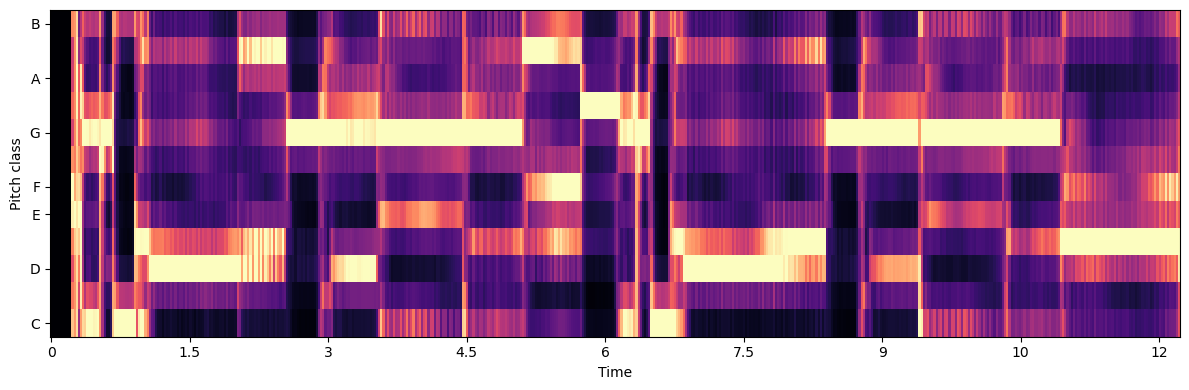

In [4]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, y_axis="chroma", x_axis="time")
plt.tight_layout()

# With calculated hop length (STFT)

In [5]:
# S = np.abs(librosa.stft(y))
hop_length_samples = int(0.1 * sr) # 100 ms * sample rate
chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length_samples)
print(chroma.shape)

(12, 123)


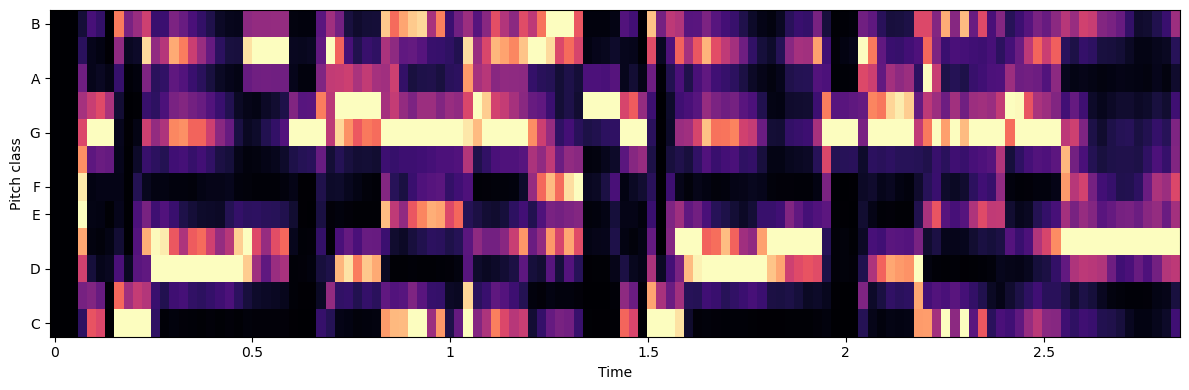

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, y_axis="chroma", x_axis="time")
plt.tight_layout()

# Enhanced (Q-Constant)
https://librosa.org/doc/main/auto_examples/plot_chroma.html#enhanced-chroma

## 1. Harmonics

In [7]:
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, hop_length=hop_length_samples)

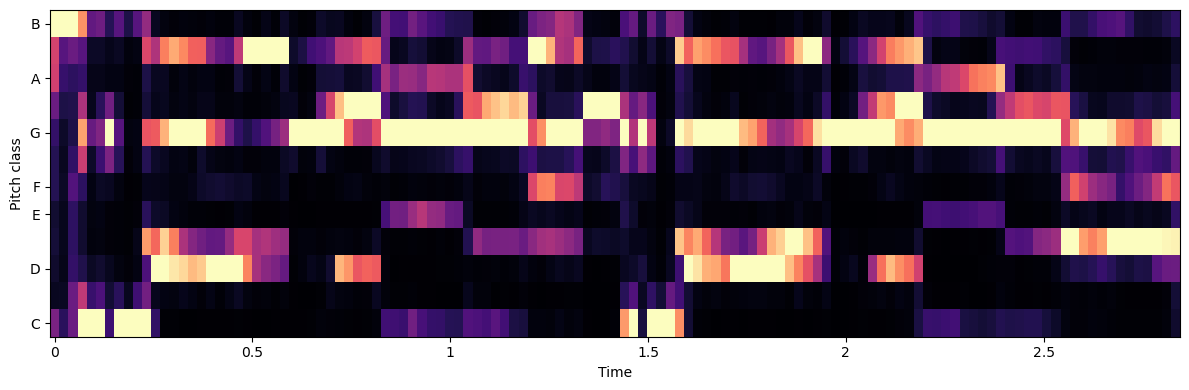

In [8]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma_harm, y_axis="chroma", x_axis="time")
plt.tight_layout()

## 2. Non local filtering

In [9]:
chroma_filter = np.minimum(
    chroma_harm,
    librosa.decompose.nn_filter(chroma_harm, aggregate=np.median)
)

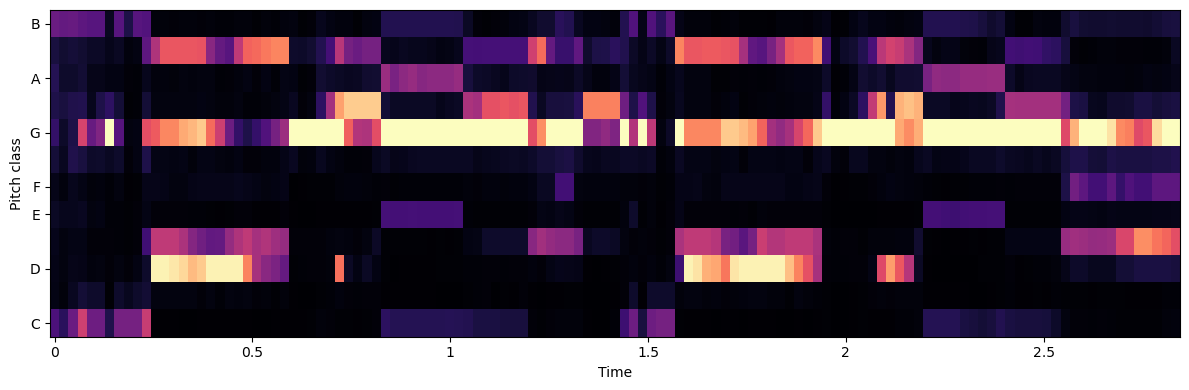

In [10]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma_filter, y_axis="chroma", x_axis="time")
plt.tight_layout()

## 3. Smoothing

In [11]:
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))

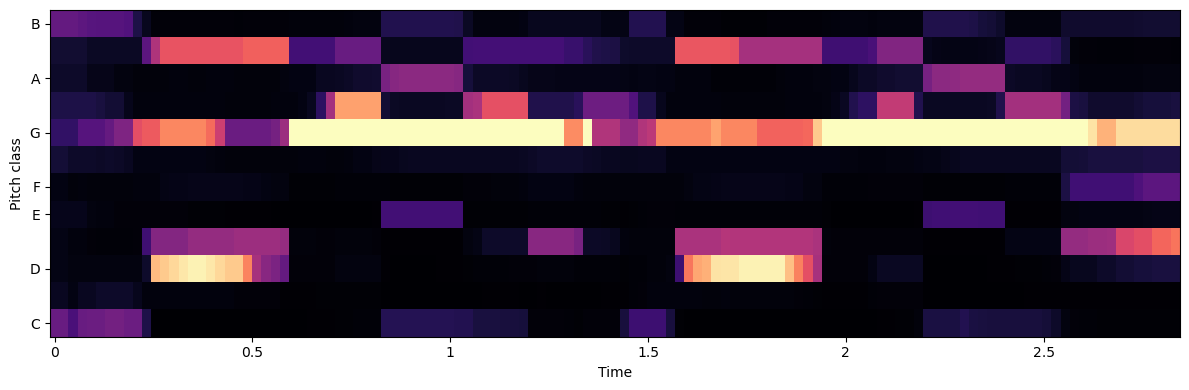

In [12]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma_smooth, y_axis="chroma", x_axis="time")
plt.tight_layout()

# Chroma CENS
https://librosa.org/doc/main/auto_examples/plot_chroma.html#chroma-variants

use this too ? (question mark)

In [13]:
# S = np.abs(librosa.stft(y))
hop_length_samples = int(0.1 * sr) # 100 ms * sample rate
chroma = librosa.feature.chroma_cens(y=y, sr=sr, hop_length=hop_length_samples)
print(chroma.shape)

(12, 123)


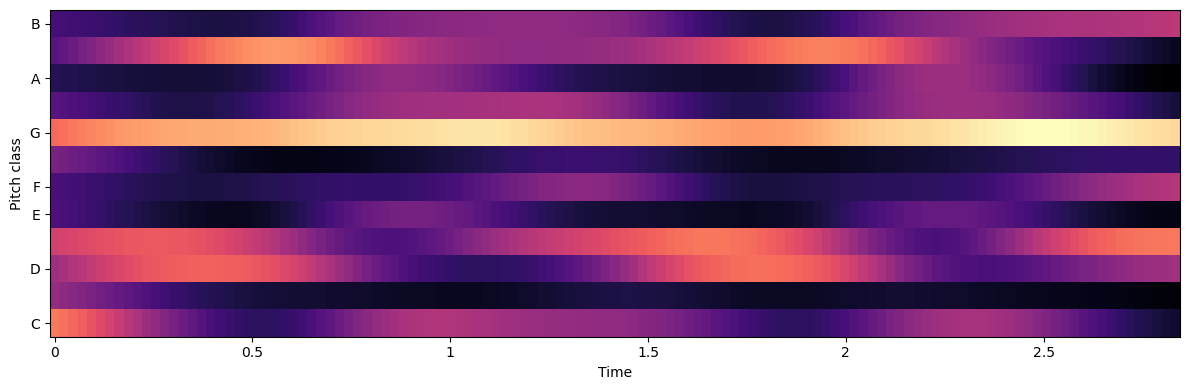

In [14]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, y_axis="chroma", x_axis="time")
plt.tight_layout()

# Dataset

In [15]:
# df = pd.lo